In [1]:
# import all packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate

from pathlib import Path

**Descriptions (from source):** <br>
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

In [2]:
# Load the data from previous step
heart = pd.read_csv('heart_EDA.csv', index_col=0)

In [3]:
# Take a look at data
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


**Descriptions (new):** <br>
- **Sex**: sex of the patient [0: Female, 1: Male]
- **ChestPainType**: chest pain type [0: Asymptomatic, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Typical Angina]
- **RestingECG**: resting electrocardiogram results [0: showing probable or definite left ventricular hypertrophy by Estes' criteria, 1: Normal, 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)]
- **ExerciseAngina**: exercise-induced angina [0: No, 1: Yes]
- **ST_Slope**: the slope of the peak exercise ST segment [0: downsloping, 1: flat, 2: upsloping]

Note that we have already encoded categorical features into labels from previous steps.

The youngest person is 28 years old.
The oldest person is 77 years old.


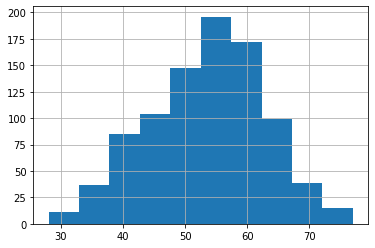

In [4]:
# Take a look at 'Age' column
heart['Age'].hist()
min_age = heart['Age'].min()
max_age = heart['Age'].max()
print(f'The youngest person is {min_age} years old.')
print(f'The oldest person is {max_age} years old.')

In [30]:
print(f'We will use 5 groups with a group range of {round((max_age-min_age)/5)} years to transform into groups.')

We will use 5 groups with a group range of 10 years to transform into groups.


In [6]:
# Transform 'Age' into groups
bins = [-np.inf, min_age+10, min_age+10*2, min_age+10*3, min_age+10*4, np.inf] # create boudaries of bins
labels = [0, 1, 2, 3, 4] # create bin labels
heart['Age'] = pd.cut(heart['Age'], bins=bins, labels=labels) # transform 'Age' to groups

heart['Age'].value_counts()

2    354
3    239
1    204
0     64
4     44
Name: Age, dtype: int64

In [7]:
# Check all data types again
heart.dtypes

Age               category
Sex                  int64
ChestPainType        int64
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG           int64
MaxHR                int64
ExerciseAngina       int64
Oldpeak            float64
ST_Slope             int64
HeartDisease         int64
dtype: object

In [8]:
# Convert 'Age' to numeric type
heart['Age'] = heart['Age'].astype('int64')
heart.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [9]:
# Check any missing values
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# Check range of each column
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,905.0,1.994475,0.983814,0.0,1.0,2.0,3.0,4.0
Sex,905.0,0.791160,0.406704,0.0,1.0,1.0,1.0,1.0
ChestPainType,905.0,0.783425,0.957938,0.0,0.0,0.0,2.0,3.0
RestingBP,905.0,132.049724,17.182028,80.0,120.0,130.0,140.0,185.0
Cholesterol,905.0,198.166851,107.164571,0.0,175.0,223.0,266.0,518.0
FastingBS,905.0,0.232044,0.422370,0.0,0.0,0.0,0.0,1.0
RestingECG,905.0,0.993370,0.631020,0.0,1.0,1.0,1.0,2.0
MaxHR,905.0,136.883978,25.294172,63.0,120.0,138.0,156.0,202.0
ExerciseAngina,905.0,0.404420,0.491051,0.0,0.0,0.0,1.0,1.0
Oldpeak,905.0,0.878785,1.050628,-2.6,0.0,0.5,1.5,5.6


We can see that some columns have much higher range than others (e.g., RestingBP, Cholesterol, MaxHR). <br>
So we need to scale the data.

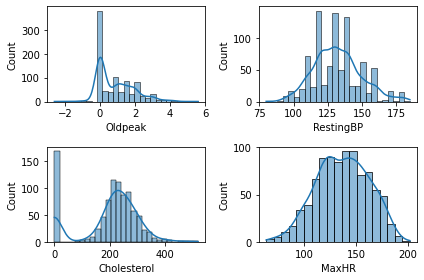

In [11]:
# Look at distributions of Oldpeak, RestingBP, Cholesterol, MaxHR

# create columns to be plotted
cols = ['Oldpeak', 'RestingBP', 'Cholesterol', 'MaxHR']
# create figure and axes
fig, axes = plt.subplots(2,2)
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data = heart[col], kde = True, ax = ax)
    
fig.tight_layout()
plt.show()

We see that 'Oldpeak' is rightly skewed, so we need to normalize it, <br>
'RestingBP', 'Cholesterol', 'MaxHR' are all normally distributed (although 'Cholestrol' has a bimodal distribution), <br>
But their scales are too big, so we need to scale them down via standardization.

In [14]:
# Set up normalization/standardization
minmax = MinMaxScaler()  
sscaler = StandardScaler() 
# Scale the data
heart['RestingBP'] = sscaler.fit_transform(heart[['RestingBP']])
heart['Cholesterol'] = sscaler.fit_transform(heart[['Cholesterol']])
heart['MaxHR'] = sscaler.fit_transform(heart[['MaxHR']])
heart['Oldpeak'] = minmax.fit_transform(heart[['Oldpeak']])

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,1,0.462965,0.848073,0,1,1.389073,0,0.317073,2,0
1,2,0,2,1.627615,-0.169617,0,1,0.756166,0,0.439024,1,1
2,0,1,1,-0.119361,0.792053,0,2,-1.538120,0,0.317073,2,0
3,1,0,0,0.346500,0.147828,0,1,-1.142554,1,0.500000,1,1
4,2,1,2,1.045290,-0.029568,0,1,-0.588760,0,0.317073,2,0


In [15]:
# Feature selection

In [17]:
# First, we divide all features into categorical and numerical
c_features = [] # for categorical features
n_features = [] # for numerical features

for i in list(heart.columns):
    if len(heart[i].unique()) > 5:  # since the length of encoded categorical labels are all under 5
        n_features.append(i)
    else:
        c_features.append(i)
print(f'Categorical features: {c_features}')
print(f'Numerical features: {n_features}')

Categorical features: ['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical features: ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [18]:
# For categorical features,
# We use Chi Squared Test

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = heart.loc[:, c_features[:-1]]  # since the last element in list is 'HeartDisease'
target = heart.loc[:, c_features[-1]]

best = SelectKBest(score_func=chi2, k='all')
model = best.fit(features, target)

scores = pd.DataFrame(data = model.scores_, 
                     columns = ['Chi Squared Score'],
                     index = list(features.columns))

In [27]:
scores.sort_values(by=['Chi Squared Score'], ascending=False)

,Chi Squared Score
ChestPainType,157.668482
ExerciseAngina,133.539906
ST_Slope,75.253554
FastingBS,49.389230
Age,30.499053
Sex,18.195453
RestingECG,1.343889


In terms of predicting heart disease, all categorical features seem important except 'RestingECG'.

In [28]:
# For numerical features
# we use ANOVA test
from sklearn.feature_selection import f_classif

features = heart.loc[:, n_features] # all numerical features
target = heart.loc[:, c_features[-1]]  # 'HeartDisease'

best = SelectKBest(score_func = f_classif, k = 'all')
model = best.fit(features, target)

scores = pd.DataFrame(data = model.scores_,
                     columns = ['ANOVA Score'],
                     index = list(features.columns))

In [29]:
scores.sort_values(by=['ANOVA Score'], ascending=False)

,ANOVA Score
Oldpeak,180.166224
MaxHR,178.733122
Cholesterol,54.061999
RestingBP,9.949882


In terms of predicting heart disease, all numerical features seem important except 'RestingBP'.

In [32]:
# Training and testing data
X = heart[heart.columns.drop(['HeartDisease', 'RestingECG', 'RestingBP'])].values # we leave out 'RestingECG' and 'RestingBP'
y = heart['HeartDisease'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 123)

We split training data and testing data by 80% and 20%

In [33]:
X_train.shape

(724, 9)

In [34]:
y_train.shape

(724,)

In [35]:
X_test.shape

(181, 9)

In [36]:
y_test.shape

(181,)

In [38]:
heart.shape[0]

905

In [39]:
# Save the file
datapath = Path('/Users/bq/Desktop/Bootcamp/Capstone_2/heart_preprocessing.csv')
heart.to_csv(datapath)